In [1]:
"""Little script to render a sky map of the pixels in the partitioned catalog"""

import json

import healpy as hp
import numpy as np
from matplotlib import pyplot as plt
import hipscat

def plot_legacy(hips_meta_fn, title):
    with open(hips_meta_fn) as f:
        catalog_md = json.load(f)

    catalog_hips = catalog_md["hips"]
    k = max([int(x) for x in catalog_hips.keys()])

    npix = hp.order2npix(k)
    orders = np.full(npix, hp.pixelfunc.UNSEEN)
    idx = np.arange(npix)
    c_orders = [int(x) for x in catalog_hips.keys()]
    c_orders.sort()

    for o in c_orders:
        k2o = 4 ** (k - o)
        pixs = catalog_hips[str(o)]
        pixk = idx.reshape(-1, k2o)[pixs].flatten()
        orders[pixk] = o

    hp.mollview(orders, max=k, title=title, nest=True)
    plt.show()

ztf_dr14_stats


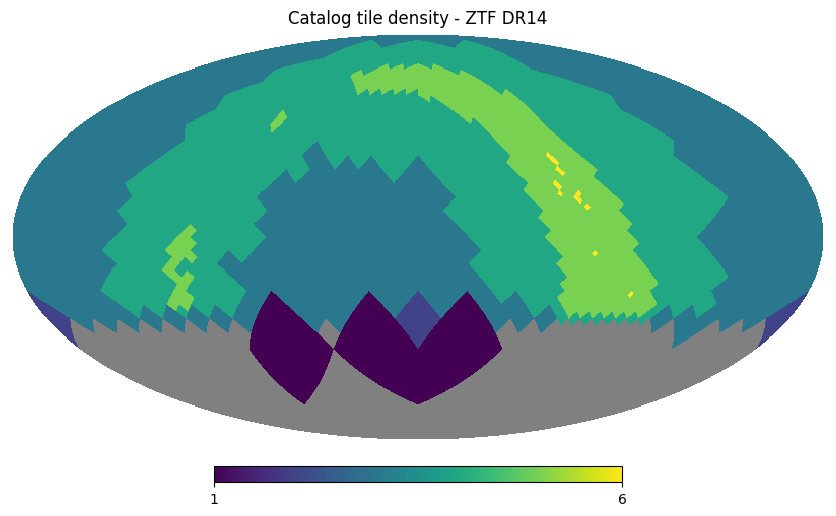

healpix orders: [1. 2. 3. 4. 5. 6.]
num partitions: 2352
------
min objects: 4442.0
max objects: 998280.0
object ratio: 224.73660513282306


In [16]:
## ZTF DR14

catalog = hipscat.catalog.Catalog("/data3/epyc/data3/hipscat/catalogs/ztf_dr14_stats/")

print(catalog.catalog_name)

legacy_meta_file = "/data3/epyc/data3/hipscat/catalogs/ztf_dr14_stats/ztf_dr14_stats_meta.json"
plot_legacy(legacy_meta_file, "Catalog tile density - ZTF DR14")

partition_data = catalog.get_pixels()

print(f'healpix orders: {partition_data["order"].unique()}')
print(f'num partitions: {len(partition_data["pixel"])}')
print('------')
print(f'min objects: {partition_data["num_objects"].min()}')
print(f'max objects: {partition_data["num_objects"].max()}')
print(f'object ratio: {partition_data["num_objects"].max()/partition_data["num_objects"].min()}')


allwise


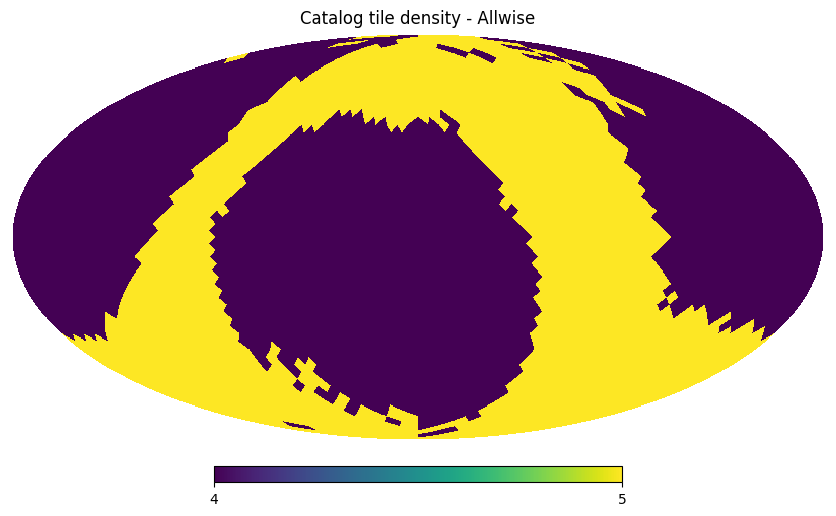

healpix orders: [4. 5.]
num partitions: 6816
------
min objects: 51986.0
max objects: 249940.0
object ratio: 4.807832878082561


In [17]:
## Allwise

catalog = hipscat.catalog.Catalog("/data3/epyc/data3/hipscat/catalogs/allwise/")

print(catalog.catalog_name)

legacy_meta_file = "/data3/epyc/data3/hipscat/catalogs/allwise/allwise_meta.json"
plot_legacy(legacy_meta_file, "Catalog tile density - Allwise")

partition_data = catalog.get_pixels()

print(f'healpix orders: {partition_data["order"].unique()}')
print(f'num partitions: {len(partition_data["pixel"])}')
print('------')
print(f'min objects: {partition_data["num_objects"].min()}')
print(f'max objects: {partition_data["num_objects"].max()}')
print(f'object ratio: {partition_data["num_objects"].max()/partition_data["num_objects"].min()}')

allwise_stats


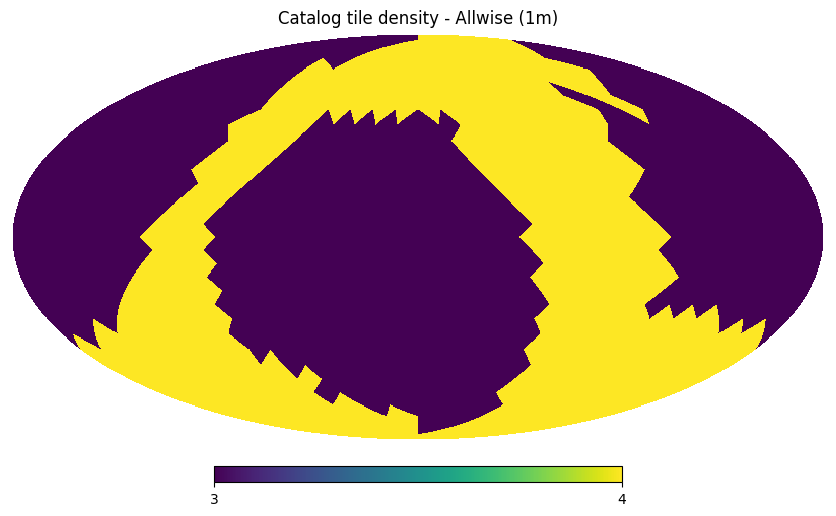

healpix orders: [3. 4.]
num partitions: 1695
------
min objects: 228796.0
max objects: 997869.0
object ratio: 4.361391807549083


In [18]:
## Allwise (threshold 1million)

catalog = hipscat.catalog.Catalog("/data3/epyc/data3/hipscat/catalogs/allwise_stats/")

print(catalog.catalog_name)

legacy_meta_file = "/data3/epyc/data3/hipscat/catalogs/allwise_stats/allwise_stats_meta.json"
plot_legacy(legacy_meta_file, "Catalog tile density - Allwise (1m)")

partition_data = catalog.get_pixels()

print(f'healpix orders: {partition_data["order"].unique()}')
print(f'num partitions: {len(partition_data["pixel"])}')
print('------')
print(f'min objects: {partition_data["num_objects"].min()}')
print(f'max objects: {partition_data["num_objects"].max()}')
print(f'object ratio: {partition_data["num_objects"].max()/partition_data["num_objects"].min()}')

ps1_skinny


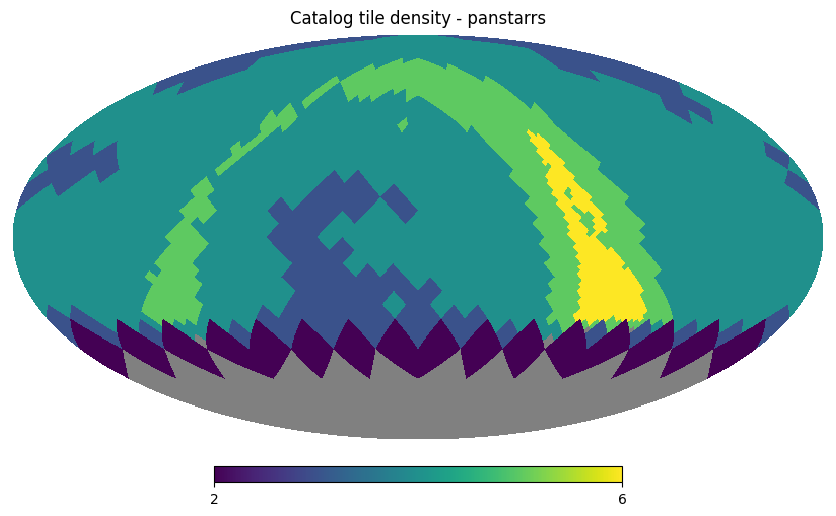

healpix orders: [2. 3. 4. 5. 6.]
num partitions: 4391
------
min objects: 577.0
max objects: 998289.0
object ratio: 1730.1369150779897


In [5]:
## PanStarrs (threshold 1million)

catalog = hipscat.catalog.Catalog("/data3/epyc/data3/hipscat/catalogs/ps1_skinny/")

print(catalog.catalog_name)

legacy_meta_file = "/data3/epyc/data3/hipscat/catalogs/ps1_skinny/ps1_skinny_meta.json"
plot_legacy(legacy_meta_file, "Catalog tile density - panstarrs")

partition_data = catalog.get_pixels()

print(f'healpix orders: {partition_data["order"].unique()}')
print(f'num partitions: {len(partition_data["pixel"])}')
print('------')
print(f'min objects: {partition_data["num_objects"].min()}')
print(f'max objects: {partition_data["num_objects"].max()}')
print(f'object ratio: {partition_data["num_objects"].max()/partition_data["num_objects"].min()}')

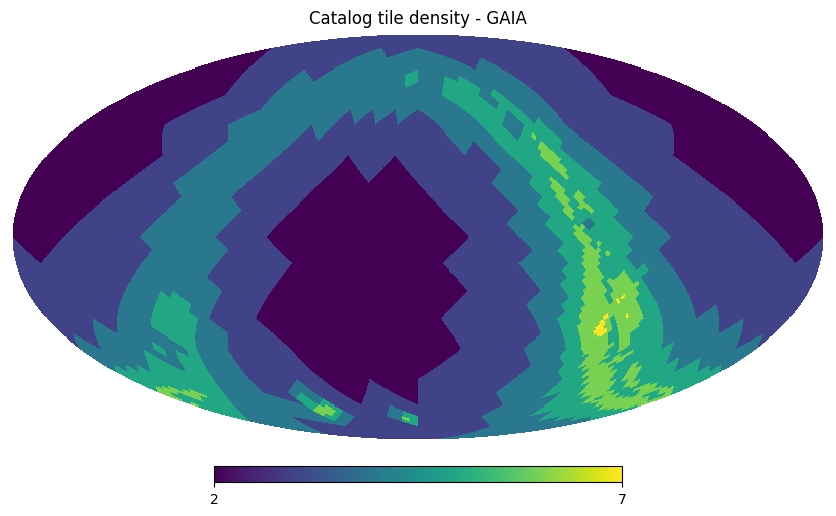

In [3]:
## Gaia
legacy_meta_file = "/epyc/projects3/sam_hipscat/output/gaia_real/gaia_real_meta.json"
plot_legacy(legacy_meta_file, "Catalog tile density - GAIA")


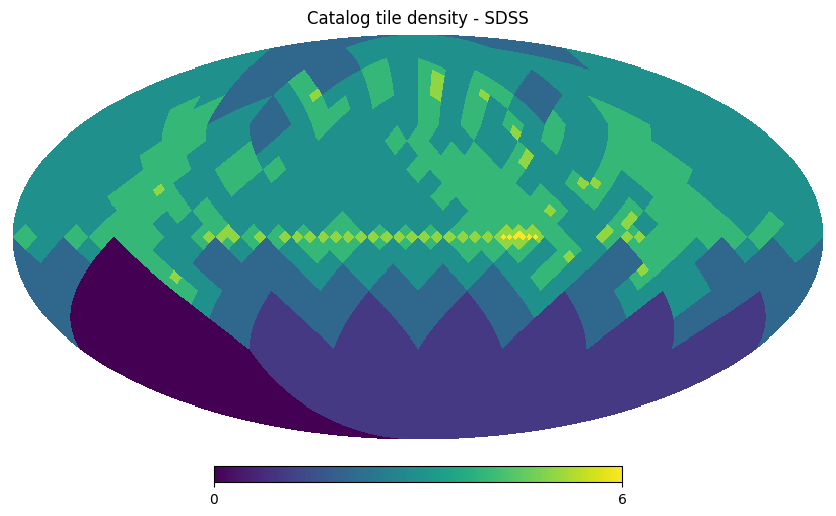

In [4]:
## SDSS

legacy_meta_file = "/epyc/projects3/sam_hipscat/output/sdss_real/sdss_real_meta.json"
plot_legacy(legacy_meta_file, "Catalog tile density - SDSS")

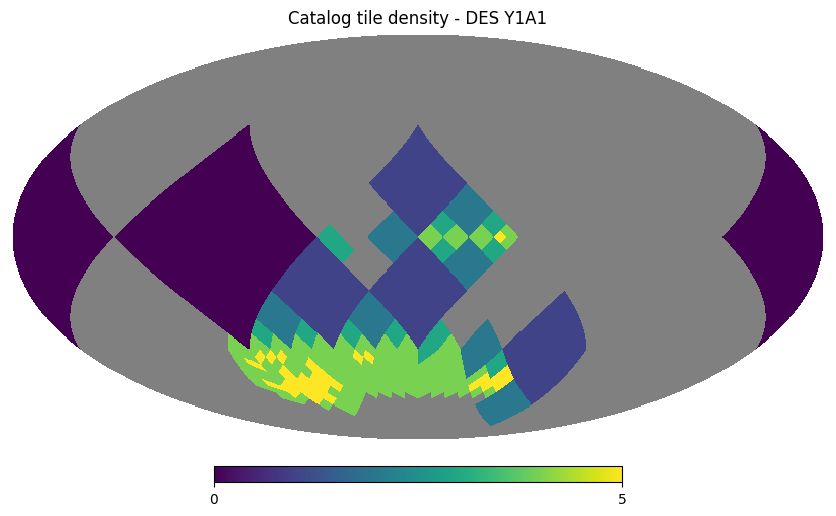

In [5]:
legacy_meta_file = "/epyc/projects3/sam_hipscat/output/des_y1a1_gold/des_y1a1_gold_meta.json"
plot_legacy(legacy_meta_file, "Catalog tile density - DES Y1A1")

neowise_1


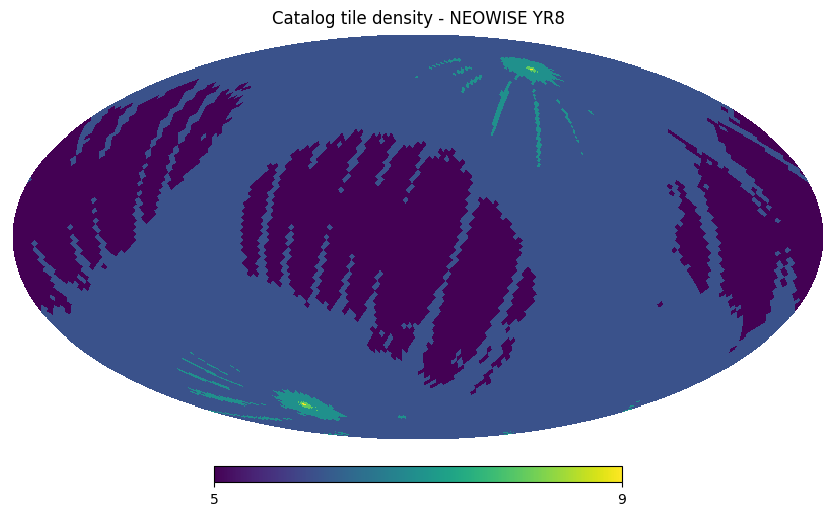

healpix orders: [5 6 7 8 9]
num partitions: 39774
total rows: 18668416994
------
min rows: 188111
max rows: 999870
object ratio: 5.315319146674038


In [6]:
## NEOWISE YR8 (threshold 1million)

catalog = hipscat.catalog.Catalog("/data3/epyc/data3/hipscat/catalogs/neowise_1/")

print(catalog.catalog_name)

legacy_meta_file = "/data3/epyc/data3/hipscat/catalogs/neowise_1/neowise_1_meta.json"
plot_legacy(legacy_meta_file, "Catalog tile density - NEOWISE YR8")

partition_data = catalog.get_pixels()

print(f'healpix orders: {partition_data["order"].unique()}')
print(f'num partitions: {len(partition_data["pixel"])}')
print(f'total rows: {partition_data["num_objects"].sum()}')
print('------')
print(f'min rows: {partition_data["num_objects"].min()}')
print(f'max rows: {partition_data["num_objects"].max()}')
print(f'object ratio: {partition_data["num_objects"].max()/partition_data["num_objects"].min()}')

In [5]:
partition_data.groupby('order')['order'].count()

order
5     3872
6    33016
7     2527
8      227
9      132
Name: order, dtype: int64